In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing

# Import des données

In [2]:
# import du fichier nettoyé
openFoodFacts = pd.read_csv('../01_DATA/openFoodFacts_final.csv', low_memory=False)

In [3]:
openFoodFacts.shape

(159571, 22)

In [4]:
openFoodFacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Unnamed: 0                                             159571 non-null  int64  
 1   code                                                   159571 non-null  object 
 2   url                                                    159571 non-null  object 
 3   product_name                                           159571 non-null  object 
 4   quantity                                               125602 non-null  object 
 5   labels_tags                                            94594 non-null   object 
 6   additives_n                                            159571 non-null  float64
 7   ingredients_from_palm_oil_n                            159571 non-null  float64
 8   ingredients_that_may_be_from_palm_

In [5]:
# suppression de la première colonne qui n'est pas une variable d'origine
openFoodFacts = openFoodFacts.drop('Unnamed: 0', axis=1)

In [6]:
openFoodFacts.describe(include='all')

,code,url,product_name,quantity,labels_tags,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,...,pnns_groups_2,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,159571,159571,159571,125602,94594,159571.000000,159571.000000,159571.000000,159571.000000,159571,...,159571,159274.000000,159272.000000,159268.000000,159209.000000,159272.000000,85246.000000,159273.000000,159380.000000,159444.000000
unique,159571,159571,123850,13224,26526,NaN,NaN,NaN,NaN,5,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4001724420309,http://world-en.openfoodfacts.org/product/3560...,Comté,500 g,en:green-dot,NaN,NaN,NaN,NaN,d,...,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,172,6009,5171,NaN,NaN,NaN,NaN,45469,...,15867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.717818,0.047546,0.127153,8.943749,NaN,...,NaN,1120.741339,14.069187,5.639522,26.480723,13.147955,2.640901,7.938420,0.359600,12.264522
std,NaN,NaN,NaN,NaN,NaN,2.367930,0.216136,0.423654,9.023653,NaN,...,NaN,771.736609,17.136290,8.427022,26.847328,18.534109,3.708376,7.812213,0.670130,25.410163
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-15.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,...,NaN,448.000000,1.200000,0.300000,3.200000,0.900000,0.300000,1.800000,0.028000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,9.000000,NaN,...,NaN,1032.000000,7.700000,2.100000,13.600000,3.800000,1.600000,6.000000,0.206324,0.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000,16.000000,NaN,...,NaN,1667.000000,22.000000,8.000000,51.300000,18.500000,3.500000,11.000000,0.480000,10.000000


# Analyse des variables d'intérêt

## Analyse univariée des données quantitatives

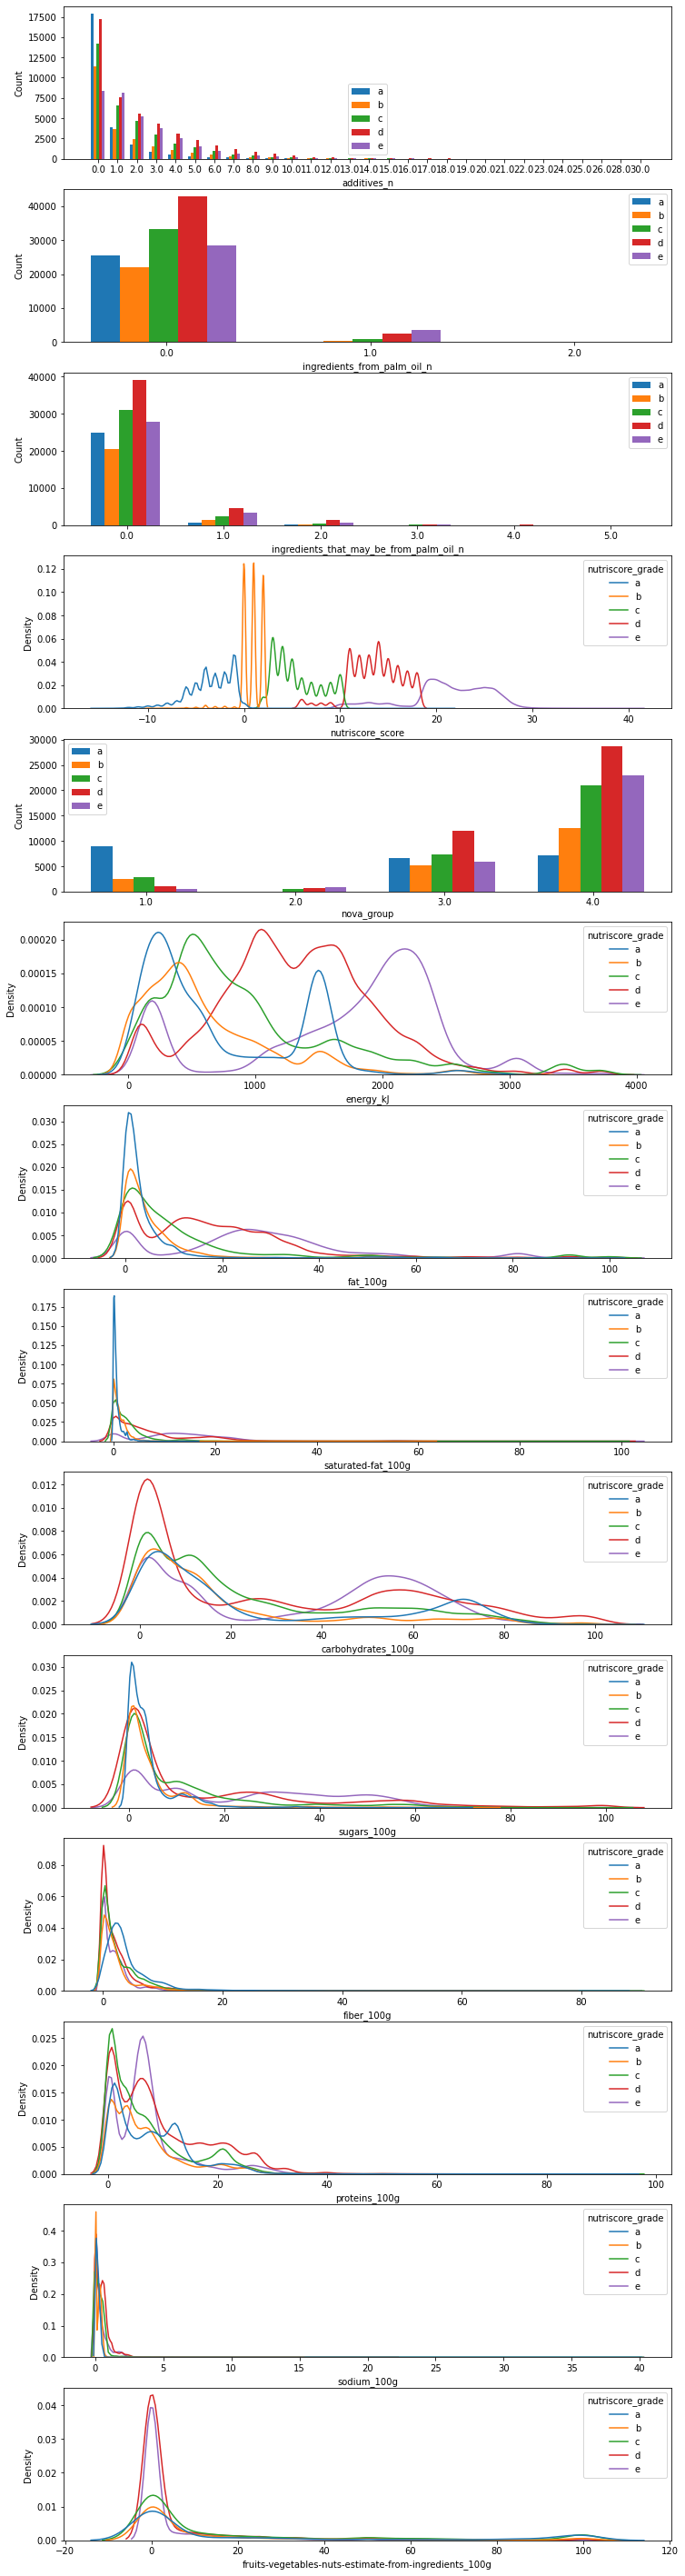

In [7]:
compteur = 1

# liste des variables à représenter sous forme de barplot
liste_cat = ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nova_group']

plt.figure(figsize=(12,55))
for item in openFoodFacts.select_dtypes('float64'):
    plt.subplot(15,1, compteur)
    ax = plt.gca()
    if item in liste_cat:
        data_fig = openFoodFacts[[item, 'nutriscore_grade']].pivot_table(index=item,
                                                                         columns='nutriscore_grade',
                                                                         aggfunc=len)
        # paramètre pour le diagramme en barres
        Nbins = data_fig.shape[0]
        Nbars = data_fig.shape[1] # Number of bars (items) per bin
        bin_width = 1.0 /(Nbars+2)
        ind = np.arange(Nbins)
        #graph
        for i in range(Nbars):
            ax.bar(x=np.arange(Nbins) + i*bin_width,
                    height=data_fig.iloc[:,i],
                    width=bin_width,
                    align='center')
        ax.set_xticks(ind+0.3)
        ax.set_xticklabels(data_fig.index.tolist())
        ax.set_ylabel('Count')
        ax.set_xlabel(item)
        ax.legend(['a', 'b', 'c', 'd', 'e'], loc = 'best')
    else:
        plot = sns.kdeplot(data=openFoodFacts, x=item, hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'))
    compteur += 1

## Analyse univariée des données qualitatives
### Labels

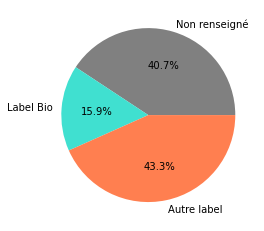

In [8]:
# creation d'un camembert pour visualiser la répartition des labels bio / non bio dans la colonne 'labels_tags'
labels = ['Non renseigné', 'Label Bio', 'Autre label']
labels_data = [openFoodFacts['labels_tags'].isna().sum(),
               len(openFoodFacts[openFoodFacts['labels_tags'].str.contains('organic') == True]),
               len(openFoodFacts['labels_tags'])-openFoodFacts['labels_tags'].isna().sum()-len(openFoodFacts[openFoodFacts['labels_tags'].str.contains('organic') == True])
              ]
plot = plt.pie(labels_data, labels=labels, normalize=True, autopct='%1.1f%%', 
               colors=['grey', 'turquoise', 'coral'], wedgeprops = {'linewidth': 3})

Seulement 59.3% des données sont renseignées pour la variable label :
- pas de données == pas de label ?
- pas de données == information non communiquée ?

Pour autant, cette variable reste intéressante dans le cadre du projet d'application basé sur le GlobalScore

Je reviendrais sur cette variable pour essayer de la compléter dans la suite de ce projet mais je construit d'ores et déjà une variable LabelBio

In [9]:
# construction de la variable LabelBio
# valeurs possibles : 0 = pas de label bio / 1 = label bio / NaN
openFoodFacts['LabelBio'] = np.where(openFoodFacts['labels_tags'].str.contains('organic') == True, 
                                     1, 
                                     np.where(openFoodFacts['labels_tags'].isna() == True, 'NaN', 0))

openFoodFacts['LabelBio'] = pd.to_numeric(openFoodFacts['LabelBio'], errors='coerce')

### Nutriscore

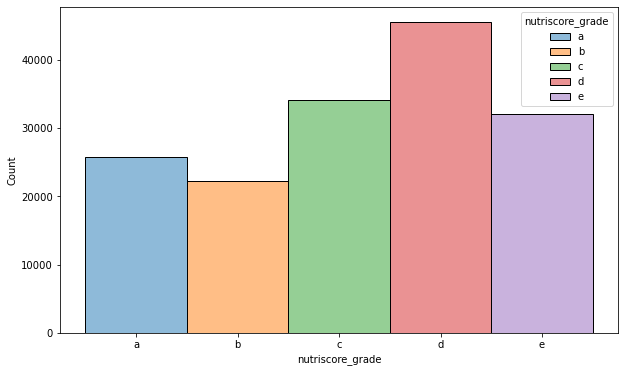

In [10]:
plt.figure(figsize=(10,6))

plot = sns.histplot(openFoodFacts.sort_values(by='nutriscore_grade'), x='nutriscore_grade', hue='nutriscore_grade')

Il y a visiblement plus de produits renseignés avec un nutriscore élevé (catégorie d ou e)
### pnns_groups_2

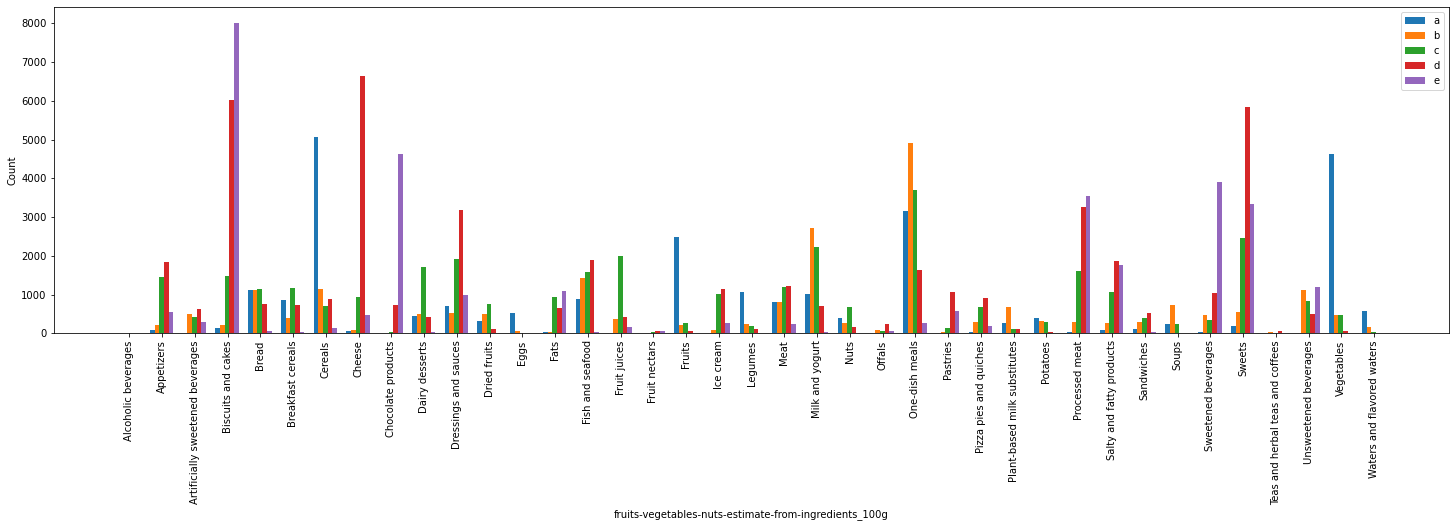

In [11]:
# regroupement des données pour leur visualisation
data_fig = openFoodFacts[['pnns_groups_2', 'nutriscore_grade']].pivot_table(index='pnns_groups_2',
                                                                            columns='nutriscore_grade',
                                                                            aggfunc=len)
# configuration du graph
plt.figure(figsize=(25,6))
ax = plt.gca()
plt.xticks(rotation=90)

# paramètre pour le diagramme en barres
Nbins = data_fig.shape[0]
Nbars = data_fig.shape[1] # nombre de barres par bins
bin_width = 1.0 /(Nbars+2)
ind = np.arange(Nbins)

#graph
for i in range(Nbars):
    ax.bar(x=np.arange(Nbins) + i*bin_width,
           height=data_fig.iloc[:,i],
           width=bin_width,
           align='center')
    ax.set_xticks(ind+0.3)
    ax.set_xticklabels(data_fig.index.tolist())
    ax.set_ylabel('Count')
    ax.set_xlabel(item)
    ax.legend(['a', 'b', 'c', 'd', 'e'])

# Etude des correlations linéaires entre variables quantitatives

## Corrélation de pearson

In [12]:
# Liste des variables quantitatives
liste = ['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy_kJ', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'LabelBio']

data = openFoodFacts[liste]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   additives_n                                            159571 non-null  float64
 1   ingredients_from_palm_oil_n                            159571 non-null  float64
 2   ingredients_that_may_be_from_palm_oil_n                159571 non-null  float64
 3   nutriscore_score                                       159571 non-null  float64
 4   nova_group                                             147287 non-null  float64
 5   energy_kJ                                              159274 non-null  float64
 6   fat_100g                                               159272 non-null  float64
 7   saturated-fat_100g                                     159268 non-null  float64
 8   carbohydrates_100g                

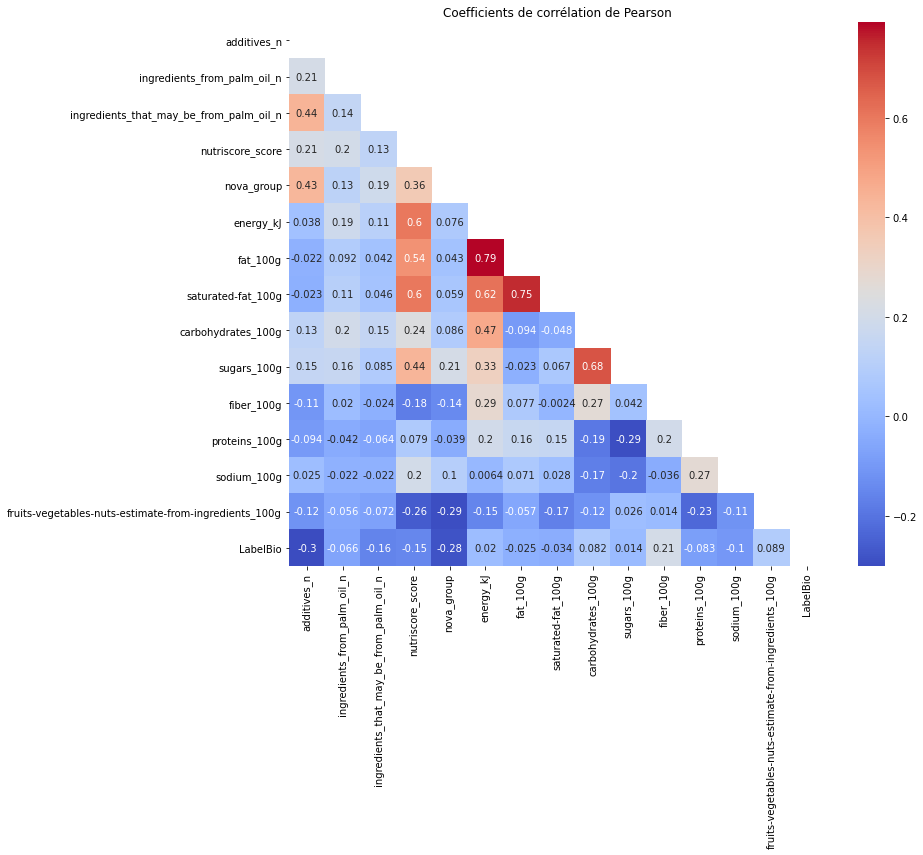

In [13]:
# calcul de la matrice de corrélation et visualisation sous forme de heatmap
corr = data.corr()
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# graph
fig = plt.figure(figsize=(12,10))
sns.heatmap(data=corr, mask=mask, annot=True,  cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()

### Variables bien corrélées (0.75-0.9) :
#### fat_100g vs energy_kj

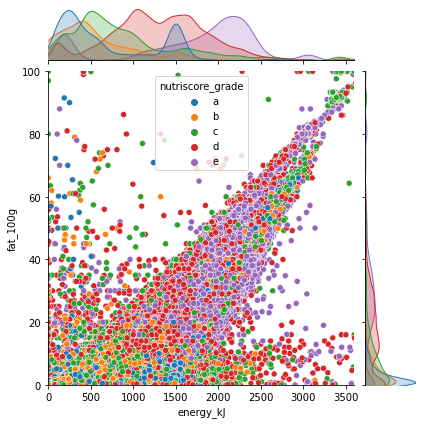

In [14]:
# visu energy vs fat_100g
sns.jointplot(data=openFoodFacts, x='energy_kJ', y='fat_100g', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(0,3600), ylim=(0,100)
             );

Plus un produit contient de matière grasse plus il a un nutriscore élevé.
#### saturated_fat et fat_100g

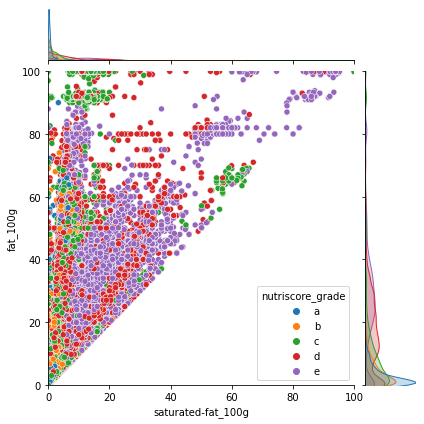

In [15]:
# visu saturated-fat vs fat_100g
sns.jointplot(data=openFoodFacts, x='saturated-fat_100g', y='fat_100g', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(0,100), ylim=(0,100)
             );

par construction, saturated_fat et fat sont corrélées => pas necessaire d'utiliser les 2 variables 

### Variables moyennement corrélées (0.5-0.75)
#### sugars vs carbohydrates

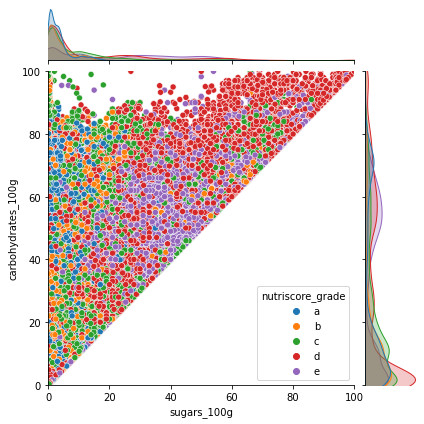

In [16]:
# visu sugars vs carbohydrates
sns.jointplot(data=openFoodFacts, x='sugars_100g', y='carbohydrates_100g', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(0,100), ylim=(0,100)
             );

par construction, sugars_100g et carbohydrates_100g sont corrélées => pas necessaire d'utiliser les 2 variables 
#### energy_kj vs nutriscore_score

C:\Users\Helene\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


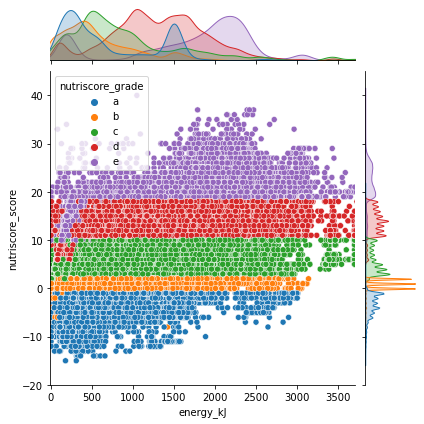

In [17]:
# visu energy_kj vs nutriscore_score
sns.jointplot(data=openFoodFacts, x='energy_kJ', y='nutriscore_score', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(-10,3700), ylim=(-20,45)
             );

Les produits ayant un nutriscore faible ont tendance à être moins energétique que ceux avec un nutriscore elevé.
#### fat_vs nutriscore_score

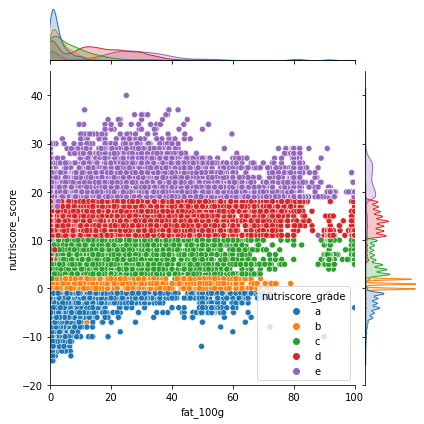

In [18]:
# visu fat_vs nutriscore_score
sns.jointplot(data=openFoodFacts, x='fat_100g', y='nutriscore_score', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(0,100), ylim=(-20,45)
             );

Les produits ayant un nutriscore faible ont tendance à avoir moins de matières grasses que ceux avec un nutriscore elevé.
#### saturated_fat vs nutriscore_score

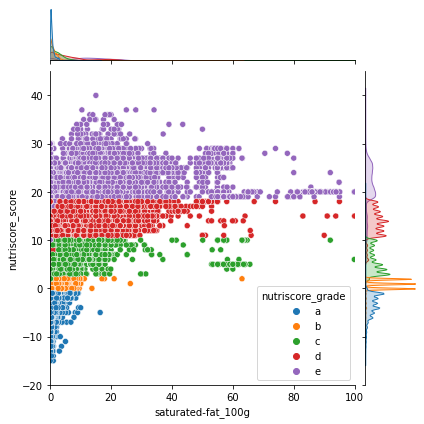

In [19]:
# visu saturated_fat vs nutriscore_score
sns.jointplot(data=openFoodFacts, x='saturated-fat_100g', y='nutriscore_score', 
              hue='nutriscore_grade', hue_order=('a', 'b', 'c', 'd', 'e'),
              xlim=(0,100), ylim=(-20,45)
             );

C'est encore plus clair pour les produits avec des acide gras saturées : les produits ayant un nutriscore faible ont tendance à être avoir moins de graisse saturée que ceux avec un nutriscore elevé.

## ACP sur les variables _100g pour verifier s'il y a une correlation avec le nutriscore 

In [20]:
from sklearn import decomposition, preprocessing
from functions import *

In [21]:
# Données pour l'ACP
# data = openFoodFacts.select_dtypes(include=['float64'])
liste_pca = ['nutriscore_score', 'fat_100g', 'carbohydrates_100g', 
             'fiber_100g', 'proteins_100g', 'sodium_100g',
             'fruits-vegetables-nuts-estimate-from-ingredients_100g',
             'nutriscore_grade']

data_pca = openFoodFacts[liste_pca]

In [22]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   nutriscore_score                                       159571 non-null  float64
 1   fat_100g                                               159272 non-null  float64
 2   carbohydrates_100g                                     159209 non-null  float64
 3   fiber_100g                                             85246 non-null   float64
 4   proteins_100g                                          159273 non-null  float64
 5   sodium_100g                                            159380 non-null  float64
 6   fruits-vegetables-nuts-estimate-from-ingredients_100g  159444 non-null  float64
 7   nutriscore_grade                                       159571 non-null  object 
dtypes: float64(7), object(1)
memory usa

In [23]:
# préparation des données
# suppression des lignes non renseignées
data_pca = data_pca.dropna(axis=0)
nutri_grade = data_pca['nutriscore_grade']
data = data_pca[['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g',
                 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutriscore_score']]
X = data.values
features = data.columns

In [24]:
data.shape

(85119, 7)

In [25]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [26]:
# choix du nombre de composantes à calculer
# p = 7, n = 85119 => nb comp = p = 7
n_comp = min(data.shape[0]-1, data.shape[1])

In [27]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=7)

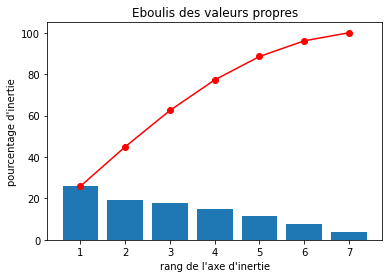

In [28]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [29]:
# critere de Kaiser
for rang in range(n_comp):
    if pca.explained_variance_ratio_[rang] < 1/n_comp:
        print("Il y a {} rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = {:0.1f}%".format(rang, 100/n_comp))
        break

Il y a 4 rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = 14.3%


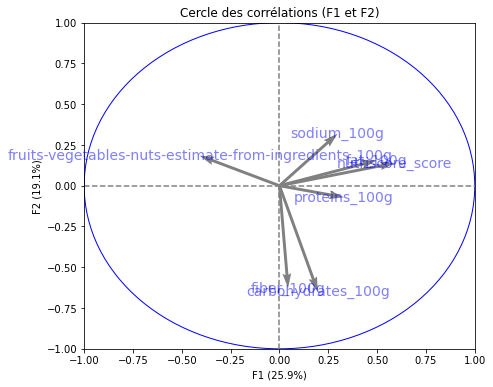

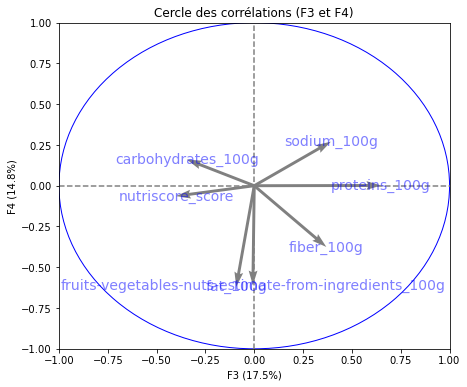

In [30]:
# Cercle des corrélations pour les 4 rangs d'inertie présentant un ratio de variance > 1/n_comp
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

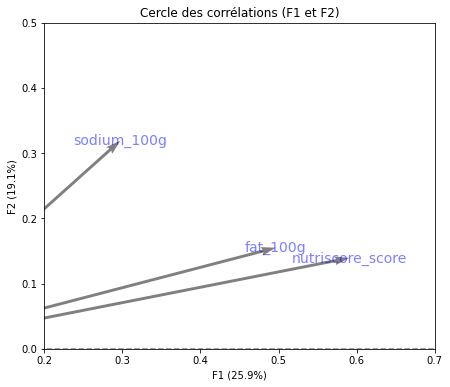

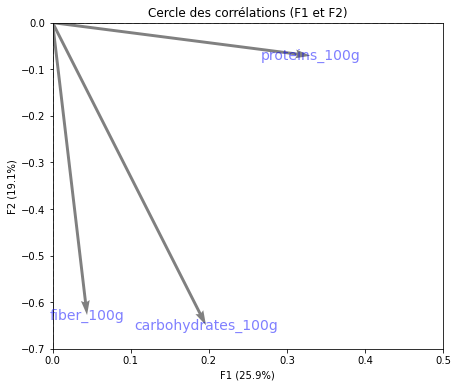

In [31]:
# zoom sur les zones regroupées
display_circles(pcs, n_comp, pca, [(0,1)], lims=[0.2, 0.7, 0.0, 0.5], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0, 0.5, -0.7, 0.0], labels = np.array(features))

### Analyse du premier cercle de corrélation (F1/F2)
- Sans surprise, le nutriscore est corrélé positivement avec la variable fat_100g : plus il y a de graisse dans un produit plus le nutriscore est elevé.
- De même, les variables fruits-vegetables-nuts-estimate-from-ingredients_100g et proteins_100g sont corrélées négativement : les fruits de contiennent pas/peu de protéines et les produits comportant beaucoup de protéines sont plutôt issus du règne animal

### Analyse du second cercle de corrélation (F3/F4)
- nutriscore et carbohydrates sont corrélés positivement : moins il y a de sucre dans un produit plus son nutriscore a des chances d'être faible

In [32]:
# Affichage de la composition des vecteurs propres
def vecteur_propre_pca(pca_components, features):
    pcs = pca_components
    
    for comp in range(len(pcs)):
        print('PC{} est composé de'.format(comp+1), end='')
        for i in range(len(features)):
            if i == 0:
                print(' {:0.3f}*{}'.format(pcs[comp,i], features[i]), end='')
            elif pcs[0,i] < 0:
                print(' {:0.3f}*{}'.format(pcs[comp,i], features[i]), end='')
            else :
                print(' + {:0.3f}*{}'.format(pcs[comp,i], features[i]), end='')
        print('\n')

In [33]:
pcs

array([[ 0.49644666,  0.19638804,  0.04412269,  0.32985994,  0.2973076 ,
        -0.40872469,  0.59056784],
       [ 0.15499558, -0.64950264, -0.62766701, -0.07107128,  0.3189528 ,
         0.18432343,  0.1392827 ],
       [-0.09232961, -0.34497301,  0.36903086,  0.64955007,  0.39233733,
        -0.00712567, -0.40048776],
       [-0.61960623,  0.16053033, -0.37535619,  0.00139391,  0.27009048,
        -0.61027128, -0.06359262],
       [-0.15274607,  0.29075129,  0.2210217 , -0.35404866,  0.73300746,
         0.40619131,  0.12505986],
       [ 0.20043967, -0.40978214,  0.41232724, -0.57932121,  0.10433987,
        -0.50528679, -0.14168337],
       [ 0.52304209,  0.37728501, -0.328857  , -0.05710122,  0.18658272,
        -0.07861978, -0.65702462]])

In [34]:
vecteur_propre_pca(pcs, features)

PC1 est composé de 0.496*fat_100g + 0.196*carbohydrates_100g + 0.044*fiber_100g + 0.330*proteins_100g + 0.297*sodium_100g -0.409*fruits-vegetables-nuts-estimate-from-ingredients_100g + 0.591*nutriscore_score

PC2 est composé de 0.155*fat_100g + -0.650*carbohydrates_100g + -0.628*fiber_100g + -0.071*proteins_100g + 0.319*sodium_100g 0.184*fruits-vegetables-nuts-estimate-from-ingredients_100g + 0.139*nutriscore_score

PC3 est composé de -0.092*fat_100g + -0.345*carbohydrates_100g + 0.369*fiber_100g + 0.650*proteins_100g + 0.392*sodium_100g -0.007*fruits-vegetables-nuts-estimate-from-ingredients_100g + -0.400*nutriscore_score

PC4 est composé de -0.620*fat_100g + 0.161*carbohydrates_100g + -0.375*fiber_100g + 0.001*proteins_100g + 0.270*sodium_100g -0.610*fruits-vegetables-nuts-estimate-from-ingredients_100g + -0.064*nutriscore_score

PC5 est composé de -0.153*fat_100g + 0.291*carbohydrates_100g + 0.221*fiber_100g + -0.354*proteins_100g + 0.733*sodium_100g 0.406*fruits-vegetables-nuts-est

In [35]:
# normalisation par rapport au nutriscore pour repérer les variables contribuant le plus au nutriscore
pcs_norm = []
for i in range(pcs.shape[0]):
    pcs_norm.append(pcs[i]/pcs[i][pcs.shape[1]-1])
pcs_norm = np.array(pcs_norm)

vecteur_propre_pca(pcs_norm, features)

PC1 est composé de 0.841*fat_100g + 0.333*carbohydrates_100g + 0.075*fiber_100g + 0.559*proteins_100g + 0.503*sodium_100g -0.692*fruits-vegetables-nuts-estimate-from-ingredients_100g + 1.000*nutriscore_score

PC2 est composé de 1.113*fat_100g + -4.663*carbohydrates_100g + -4.506*fiber_100g + -0.510*proteins_100g + 2.290*sodium_100g 1.323*fruits-vegetables-nuts-estimate-from-ingredients_100g + 1.000*nutriscore_score

PC3 est composé de 0.231*fat_100g + 0.861*carbohydrates_100g + -0.921*fiber_100g + -1.622*proteins_100g + -0.980*sodium_100g 0.018*fruits-vegetables-nuts-estimate-from-ingredients_100g + 1.000*nutriscore_score

PC4 est composé de 9.743*fat_100g + -2.524*carbohydrates_100g + 5.903*fiber_100g + -0.022*proteins_100g + -4.247*sodium_100g 9.597*fruits-vegetables-nuts-estimate-from-ingredients_100g + 1.000*nutriscore_score

PC5 est composé de -1.221*fat_100g + 2.325*carbohydrates_100g + 1.767*fiber_100g + -2.831*proteins_100g + 5.861*sodium_100g 3.248*fruits-vegetables-nuts-estim

- Le premier axe corrèle principalement nutriscore et fat_100g, fruit-vegetables-..., proteins et sodium
- le deuxième axe corrèle positivement principalement nutriscore et fat, sodium, fruit et négativement nutriscore et fiber, carbohydrates et proteins

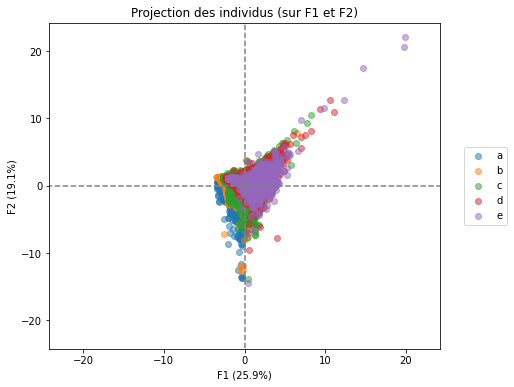

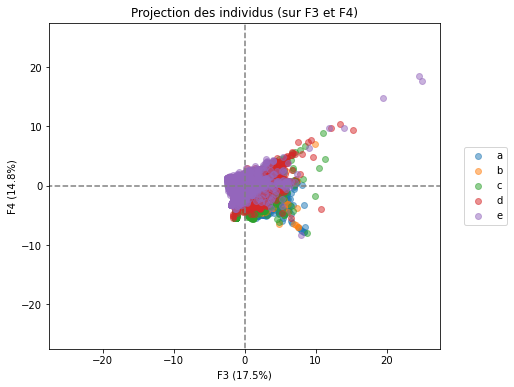

In [36]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var=nutri_grade, alpha = 0.5)
plt.show()

Les produits avec un nutriscore élevé (catégorie e) sont représenté principalement dans la cadran supérieur droit du premier cercle de corrélation : ils contiennent plus de graisse et sel que les autres produits

De même, les produits avec un nutriscore faible (catégorie a) ont tendance à être plus centrés et localisés dans le cadran inférieur du premier cercle de corrélation : il s'agit de produits comprenant plus de fibres que les autres produits.

## ACP pour trouver les variables qui permettront de compléter la variable Label

In [37]:
# Données pour l'ACP

liste_pca_2 = ['nutriscore_score', 'fat_100g', 'carbohydrates_100g', 
             'fiber_100g', 'proteins_100g', 'sodium_100g',
             'fruits-vegetables-nuts-estimate-from-ingredients_100g',
             'nutriscore_grade', 'additives_n', 'ingredients_from_palm_oil_n',
             'ingredients_that_may_be_from_palm_oil_n', 'LabelBio']

data_pca_2 = openFoodFacts[liste_pca_2]

# préparation des données
# suppression des lignes non renseignées
data_pca_2 = data_pca_2.dropna(axis=0)

# pour la visualisation des projections des individus
bio = data_pca_2['LabelBio']

data_2 = data_pca_2[['nutriscore_score', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 
                     'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
                     'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
                     'LabelBio']]

X = data_2.values
features = data_2.columns
X.shape

(54400, 11)

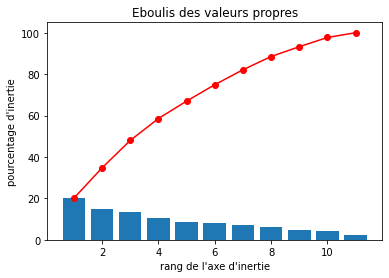

In [38]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
                    
# choix du nombre de composantes à calculer
# min (p, n-1)
# avec p = nb variables
# n = nombre d'individus
n_comp = min(data_2.shape[0]-1, data_2.shape[1])

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

In [39]:
# critere de Kaiser
for rang in range(n_comp):
    if pca.explained_variance_ratio_[rang] < 1/n_comp:
        print("Il y a {} rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = {:0.1f}%".format(rang, 100/n_comp))
        break

Il y a 4 rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = 9.1%


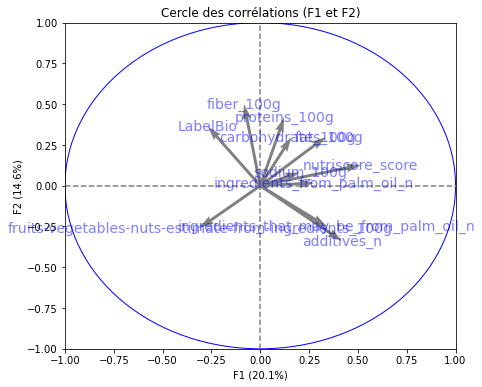

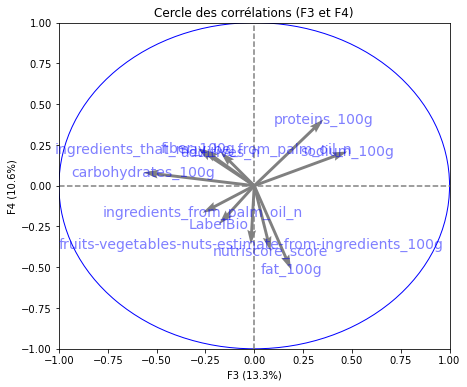

In [40]:
# Cercle des corrélations pour les 4 rangs d'inertie présentant un ratio de variance > 1/n_comp
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

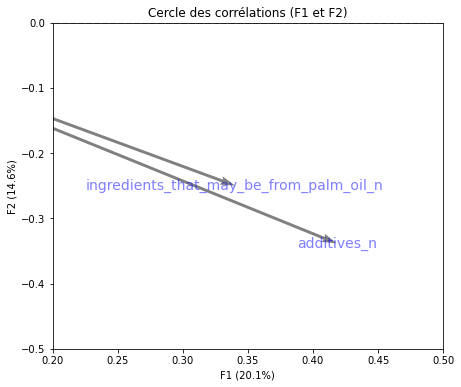

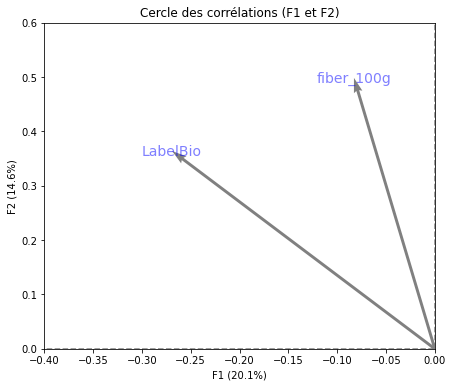

In [41]:
# zoom sur les zones regroupées du premier plan 
display_circles(pcs, n_comp, pca, [(0,1)], lims=[0.2, 0.5, -0.5, 0.0], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1)], lims=[-.4, 0.0, .0, 0.6], labels = np.array(features))

Sur le premier plan factoriel, LabelBio semble corrélé négativement avec ingredients_that_may_be_from_palm_oil_n et additives_n

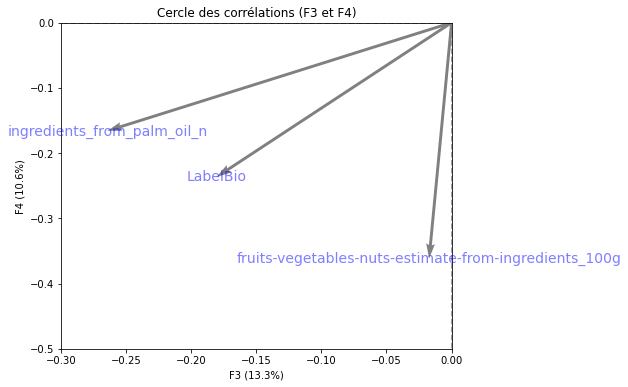

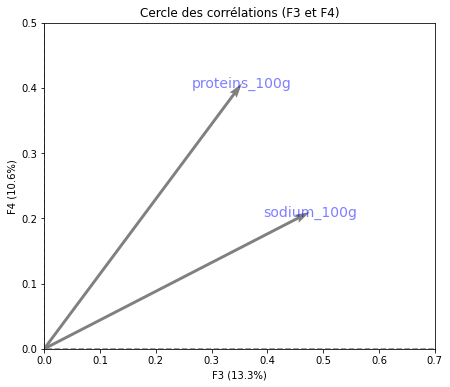

In [42]:
# zoom sur les zones regroupées du second plan 
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.3, 0.0, -0.5, 0.0], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[0.0, 0.7, 0.0, 0.5], labels = np.array(features))

La variable LabelBio semble corrélée positivement avec ingredients_from_palm_oil_n et négativement avec proteins_100g et sodium_100g

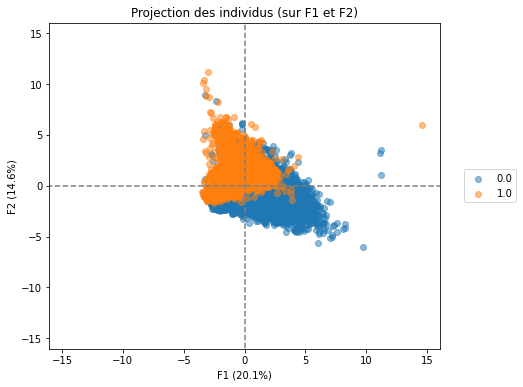

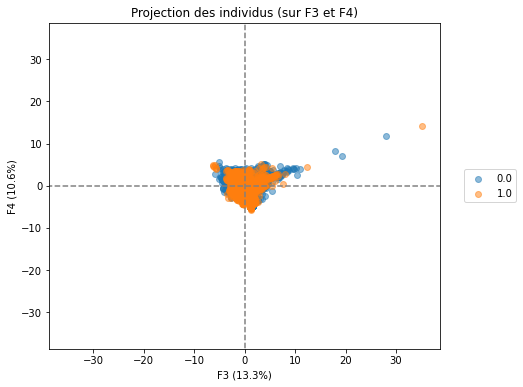

In [43]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var=bio, alpha = 0.5)
plt.show()

La variable LabelBio semble surtout drivée par la corrélation négative entre labelBio et additives_n et ingredients_that_may_be_from_palm_oil_n


==> Je garde les variables corrélées avec LabelBio pour tester un kNN pour imputer les valeurs manquantes de LabelBio

# kNN pour compléter la variable labels bio / non bio

In [44]:
# préparation des données
liste_knn = ['proteins_100g', 'sodium_100g', 
             'additives_n', 'ingredients_from_palm_oil_n', 
             'ingredients_that_may_be_from_palm_oil_n'
            ]

Xdata = openFoodFacts[openFoodFacts['LabelBio'].notna()][liste_knn].dropna(axis=0)
y = openFoodFacts['LabelBio'].loc[Xdata.index]

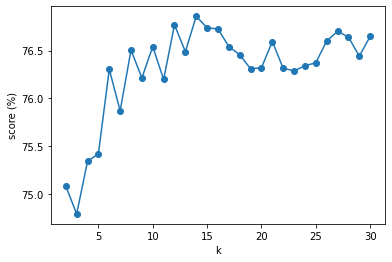

Le meilleur score est : 76.86% pour k=14.


In [45]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# creation du training set et du test set
xtrain, xtest, ytrain, ytest = train_test_split(Xdata, y, train_size=0.8, random_state=17)

# optimisation du score
score = []
score_max = 0
for k in range(2,31):
    knn = neighbors.KNeighborsClassifier(k)
    score.append(100*knn.fit(xtrain, ytrain).score(xtest, ytest))
    if score[k-2] > score_max:
        score_max = score[k-2]
        k_opt = k

plt.plot(range(2,31), score, 'o-')
plt.xlabel('k')
plt.ylabel('score (%)')
plt.show()
print('Le meilleur score est : {:0.2f}% pour k={}.'.format(score_max,k_opt))

Au vu de la quantité de données manquantes (40.7% de 159.6k données), il est interessant de remplacer les valeurs NaN par le résultat du kNN tout en gardant en tête que l'erreur d'imputation est de 23.14%.

In [46]:
# récupération du classifieur le plus performant
knn = neighbors.KNeighborsClassifier(14)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=14)

In [47]:
liste_knn_predict = ['proteins_100g', 'sodium_100g', 
                     'additives_n', 'ingredients_from_palm_oil_n', 
                     'ingredients_that_may_be_from_palm_oil_n'
                    ]

data_a_remplir = openFoodFacts[openFoodFacts['LabelBio'].isna()][liste_knn_predict].dropna(axis=0)

predicted = knn.predict(data_a_remplir)

data_a_remplir['LabelBio_predicted'] = predicted

In [48]:
labelBio_df = data_a_remplir['LabelBio_predicted']

In [49]:
openFoodFacts = openFoodFacts.merge(labelBio_df, how='outer', left_index=True, right_index=True)
openFoodFacts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   code                                                   159571 non-null  object 
 1   url                                                    159571 non-null  object 
 2   product_name                                           159571 non-null  object 
 3   quantity                                               125602 non-null  object 
 4   labels_tags                                            94594 non-null   object 
 5   additives_n                                            159571 non-null  float64
 6   ingredients_from_palm_oil_n                            159571 non-null  float64
 7   ingredients_that_may_be_from_palm_oil_n                159571 non-null  float64
 8   nutriscore_score                  

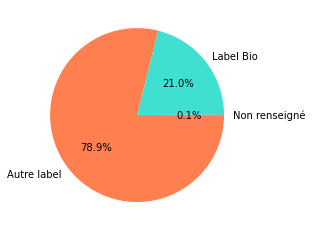

In [50]:
# construction de la variable synthétique LabelBio_global qui regroupe à la fois les valeurs observées (labelBio)
# et les valeurs prédites (LabelBio_predicted) sur les valeurs manquantes de LabelBio
openFoodFacts['LabelBio_global'] = np.where(openFoodFacts['LabelBio'].isna(),
                                           openFoodFacts['LabelBio_predicted'],
                                           openFoodFacts['LabelBio'])

# creation d'un camembert pour visualiser la répartition des labels bio / non bio dans la colonne 'LabelBio_global'
labels = ['Non renseigné', 'Label Bio', 'Autre label']
labels_data = [openFoodFacts['LabelBio_global'].isna().sum(),
               len(openFoodFacts[openFoodFacts['LabelBio_global'] == 1]),
               len(openFoodFacts['LabelBio_global'])-openFoodFacts['LabelBio_global'].isna().sum()-len(openFoodFacts[openFoodFacts['LabelBio_global'] == 1])
              ]
plot = plt.pie(labels_data, labels=labels, normalize=True, autopct='%1.1f%%', 
               colors=['grey', 'turquoise', 'coral'], wedgeprops = {'linewidth': 3})

Il reste 0.1% de valeurs non renseignées. Le kNN n'a pas pu les remplacer car il manquait des valeurs dans les variables sur lesquelles s'appuie l'imputation.

## ACP sur les variables nutriscore_score, additives_n, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n et labels

In [51]:
# selection des données
liste_pca_3 = ['nutriscore_score', 'additives_n', 'ingredients_from_palm_oil_n',
               'ingredients_that_may_be_from_palm_oil_n', 'LabelBio_global',
               'nutriscore_grade', 'pnns_groups_2']

data_pca_3 = openFoodFacts[liste_pca_3]
data_pca_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   nutriscore_score                         159571 non-null  float64
 1   additives_n                              159571 non-null  float64
 2   ingredients_from_palm_oil_n              159571 non-null  float64
 3   ingredients_that_may_be_from_palm_oil_n  159571 non-null  float64
 4   LabelBio_global                          159368 non-null  float64
 5   nutriscore_grade                         159571 non-null  object 
 6   pnns_groups_2                            159571 non-null  object 
dtypes: float64(5), object(2)
memory usage: 9.7+ MB


In [52]:
# préparation des données
# suppression des lignes non renseignées
data_pca_3 = data_pca_3.dropna(axis=0)

# pour la visualisation des projections des individus
nutri_grade = data_pca_3['nutriscore_grade']
categorie = data_pca_3['pnns_groups_2']
palm = data_pca_3['ingredients_from_palm_oil_n']
bio = data_pca_3['LabelBio_global']

data_3 = data_pca_3[['nutriscore_score', 'additives_n', 'ingredients_from_palm_oil_n',
                     'ingredients_that_may_be_from_palm_oil_n', 'LabelBio_global']]

X = data_3.values
features = data_3.columns
X.shape

(159368, 5)

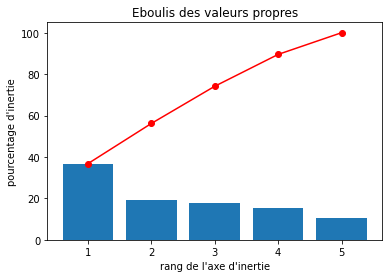

In [53]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# choix du nombre de composantes à calculer
# min (p, n-1)
# avec p = nb variables
# n = nombre d'individus
n_comp = min(data_3.shape[0]-1, data_3.shape[1])

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

In [54]:
# critere de Kaiser
for rang in range(n_comp):
    if pca.explained_variance_ratio_[rang] < 1/n_comp:
        print("Il y a {} rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = {:0.1f}%".format(rang, 100/n_comp))
        break

Il y a 1 rangs d'inertie qui présentent un ratio de variance supérieur à 1/n_comp = 20.0%


Le critère du coude et le critère de Kaiser sont cohérents, il ne faudrait conserver que le premier axe. Mais cet axe n'explique que 36.8% de la variance totale.

Le premier plan (F1 et F2) explique 56.2% de la variance totale. 

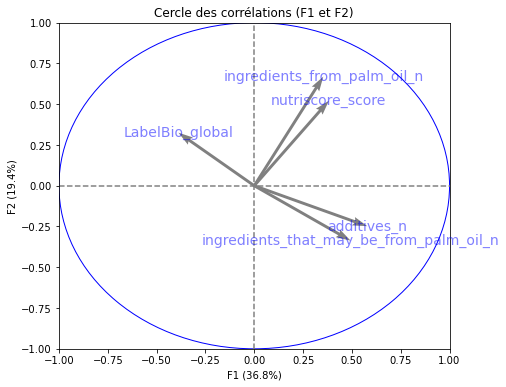

In [55]:
# Cercle des corrélations pour les 2 premiers rangs d'inertie
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

- Le nutriscore est positivement corrélé à ingredients_from_palm_oil : plus il y a d'ingrédients à base d'huile de palme dans un produit plus le nutriscore est élevé
- le label bio et négativement corrélé à ingredients_that_may_be_from_palm_oil et additives : plus il y d'ingrédients probablement à base d'huile de palme et/ou d'additifs dans un produit, moins il est probable que ce produit ait un label bio

In [56]:
vecteur_propre_pca(pcs, features)

PC1 est composé de 0.382*nutriscore_score + 0.579*additives_n + 0.354*ingredients_from_palm_oil_n + 0.493*ingredients_that_may_be_from_palm_oil_n -0.388*LabelBio_global

PC2 est composé de 0.521*nutriscore_score + -0.248*additives_n + 0.669*ingredients_from_palm_oil_n + -0.337*ingredients_that_may_be_from_palm_oil_n 0.325*LabelBio_global

PC3 est composé de -0.399*nutriscore_score + 0.150*additives_n + 0.272*ingredients_from_palm_oil_n + 0.495*ingredients_that_may_be_from_palm_oil_n 0.706*LabelBio_global

PC4 est composé de -0.648*nutriscore_score + -0.009*additives_n + 0.586*ingredients_from_palm_oil_n + -0.240*ingredients_that_may_be_from_palm_oil_n -0.422*LabelBio_global

PC5 est composé de -0.050*nutriscore_score + 0.762*additives_n + -0.097*ingredients_from_palm_oil_n + -0.584*ingredients_that_may_be_from_palm_oil_n 0.257*LabelBio_global



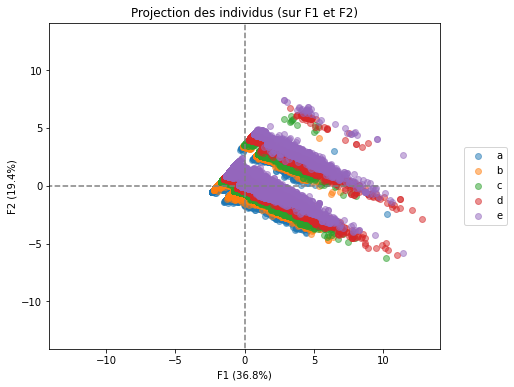

In [57]:
# Projection des individus selon leur nutriscore
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=nutri_grade, alpha = 0.5)
plt.show()

Les individus sont visiblement regroupés en trois groupes. Ces groupes ne sont pas liés au nutriscore, même si une tendance est visible au sein de chaque groupe : 
- plus le nutriscore est elevé plus les individus ont tendances à être dans le cadran supérieur droit, c'est à dire à avoir d'ingrédients à base d'huile de palme
- plus le nutriscore est élevé plus les individus ont tendance à s'étaler sur l'axe F1, c'est à dire à avoir un nimbre d'additifs elevé et à avoir des ingrédients probablement à base d'huile de palme.

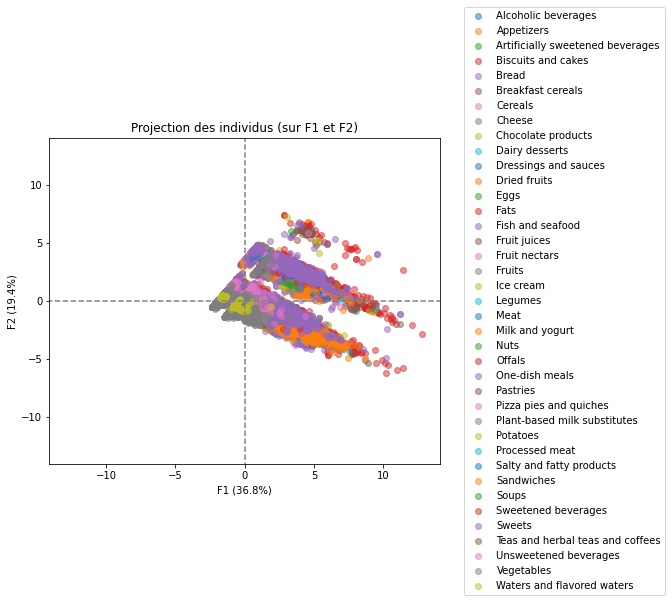

In [58]:
# Projection des individus selon leur catégorie
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=categorie, alpha = 0.5)
plt.show()

Les trois groupes ne sont pas non plus liés aux catégories de produit

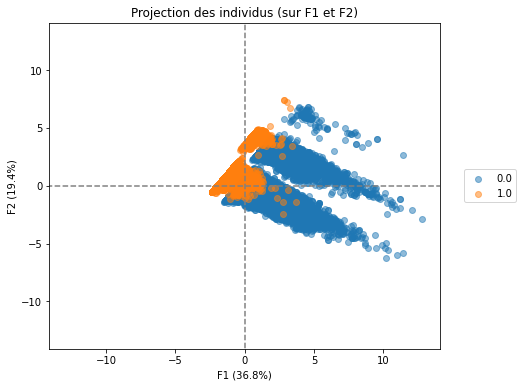

In [59]:
# Projection des individus selon leur label bio/non bio
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=bio, alpha = 0.5)
plt.show()

Ces groupes ne sont pas liés au label bio/non bio, même si une tendance est visible au sein de chaque groupe : 
- les individus présentant un label bio ont tendance à avoir peu d'additifs et d'ingrédients fabriqués à base d'huile de palme

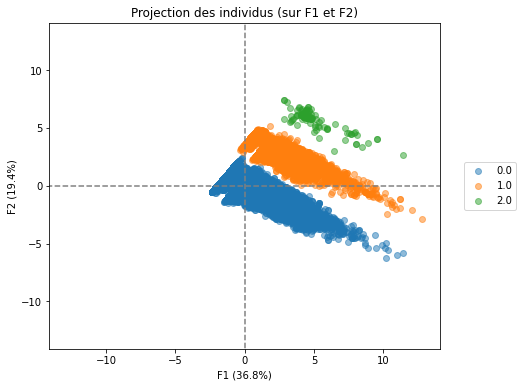

In [60]:
# Projection des individus selon la quantité d'ingrédients issus de l'huile de palme
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=palm, alpha = 0.5)
plt.show()

Les trois groupes correspondent aux nombre d'ingrédients composés d'huile de palme.
Au sein de ces trois groupes, les produits avec nutriscore élevé ont tendance à s'étaler vers le cadrant inférieur droit : plus il y a d'additifs et d'ingrédients pouvant être issus d'huile de palme plus le nutriscore à un risque d'être élevé. Les produits avec un label bio quant à eux se retrouvent dans la partie supérieure gauche

### KMeans pour essayer de regrouper différemment les données

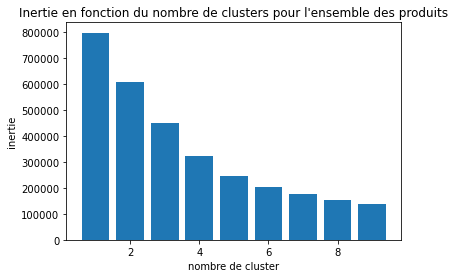

In [61]:
inertie = []

for n_clust in range(1,10):
    # Clustering par K-means
    km = KMeans(n_clusters= n_clust)
    km.fit(X_scaled)
    inertie.append(km.inertia_)

plt.bar(range(1,10),inertie)
plt.xlabel('nombre de cluster')
plt.ylabel("inertie")
plt.title("Inertie en fonction du nombre de clusters pour l'ensemble des produits")
plt.show()

Visiblement un coude se fait au niveau de k=4

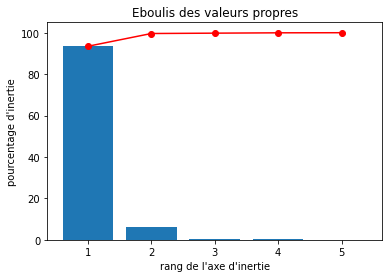

In [62]:
# nombre de clusters souhaité
n_clust = 4

# clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# recupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

# affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=n_comp).fit(X)
X_projected = pca.transform(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

93.5% de la variance totale est expliquée par le premier axe d'inertie. Le premier plan factoriel explique 99.7% de la variance totale

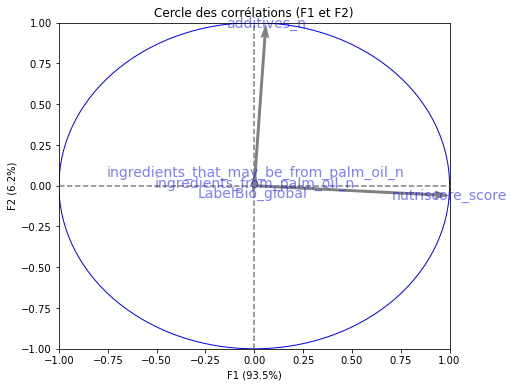

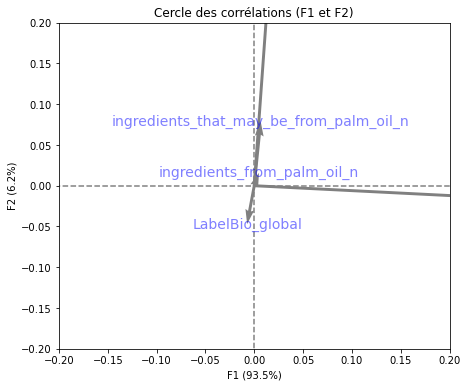

In [63]:
# Cercle des corrélations pour les 2 premiers rangs d'inertie
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
# zoom sur le centre
display_circles(pcs, n_comp, pca, [(0,1)], lims=[-0.2, 0.2, -0.2, 0.2], labels = np.array(features))

Le premier axe est complètement équivalent au nutriscore quand le second axe est lui intégralement lié au nombre d'additifs.
Le KMeans ne permet donc pas de mieux regrouper nos données

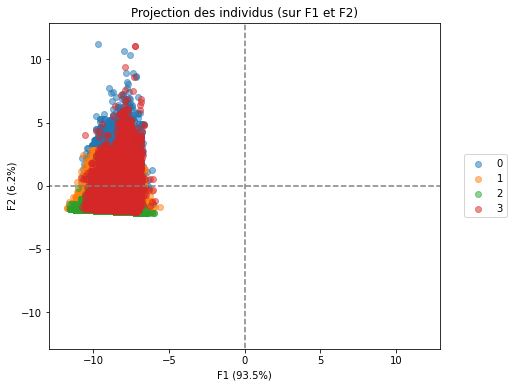

In [64]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=clusters, alpha = 0.5)
plt.show()

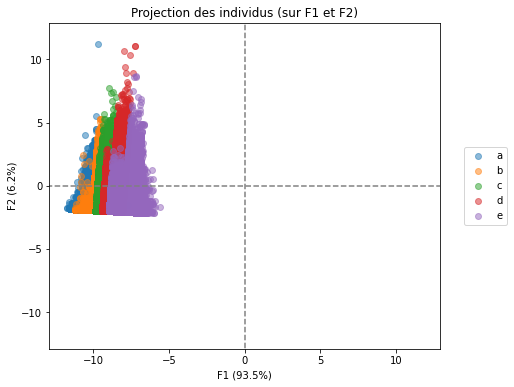

In [65]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=nutri_grade, alpha = 0.5)
plt.show()

Le Kmeans n'est pas concluant pour mieux visualiser les liens entre données dans cette ACP

# Conclusion
**Problématique de la variable labels_tags avec 40,6% de valeurs manquantes**
- Simplification de la variable : Bio / non bio / NaN
- ACP pour identifier les variables potentiellement liées
- kNN permet de compléter la variable et réduit le pourcentage de valeurs manquantes à 0,1% 

**=>** ACP sur les variables d’intérêt montre bien un lien cohérent entre ces variables

Le calcul du globalScore est pertinent. Les liens entre variables identifiés grâce à l’ACP montrent qu’il sera possible de proposer des produits alternatifs au consommateur même si certaines variables sont partiellement renseignées.

**Améliorations possibles :**

Imputation sur le label bio : revenir aux données visuelles pour vérifier l’imputation